<a href="https://colab.research.google.com/github/yestrella14/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi^2 Tests

Use the following dataset relating to math scores of students in two different Portugese schools:

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

### 1) Load the dataset specifically relating to math scores as a new dataframe.

There are two datasets in the `student.zip` file, make sure you use `student-mat.csv`.


In [22]:
# YOUR WORK HERE
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

--2020-07-31 21:44:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip.3’

student.zip.3       100%[===================>]  20.00K  --.-KB/s    in 0.04s   

2020-07-31 21:44:33 (555 KB/s) - ‘student.zip.3’ saved [20478/20478]



In [ ]:
!unzip student.zip

Archive:  student.zip
replace student-mat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace student-por.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace student-merge.R? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace student.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [24]:
#Import the libraries
import numpy as np
import pandas as pd
from scipy import stats
#from scipy.stats import chisquare #one way chi squared test
#from scipy.stats import chi2_contingency


In [25]:
#Read the dataset

students1 = pd.read_csv('student-mat.csv', sep=';')
print(students1.shape)
students1.tail(3)

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [26]:
students1['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [ ]:
#students1.describe()

In [27]:
#What are the categorical values in the dataset?
students1.describe(exclude='number')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## 2) Use Chi^2 tests and `stats.chi2_contingency()` to identify:
 - Two pairs of variables that are dependent (are associated with one another).
 - Two pairs of variables that are independent (have no significant relationship).

Does it make intuitive sense why the variables in these pairs might or might not show a relationship to one another? 


In [ ]:
# YOUR WORK HERE


###Two pairs of variables that are dependent (are associated with one another)


1) Null Hypothesis: There is no relationship between Sex and Higher Education

2)Alternative hypothesis: There is a relationship between sex and Higher Education

3)Confidence Level: 95%

In [28]:
students1['sex'].value_counts()


F    208
M    187
Name: sex, dtype: int64

In [29]:
students1['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

In [45]:
observed_Sex_Higher = pd.crosstab(students1['sex'], students1['higher']).values
print(observed_Sex_Higher.shape)
observed_Sex_Higher

(2, 2)


array([[  4, 204],
       [ 16, 171]])

In [31]:
chi_squared_Sex_Higher, p_value_Sex_Higher, dof_Sex_Higher, expected_Sex_Higher =stats.chi2_contingency(observed_Sex_Higher)
print(f"Chi-Squared: {chi_squared_Sex_Higher}")
print(f"P-Value: {p_value_Sex_Higher}")
print(f"Degree of Freedom: {dof_Sex_Higher}")
print(f"Expected: {expected_Sex_Higher}")

Chi-Squared: 7.685935036164814
P-Value: 0.005565283789132665
Degree of Freedom: 1
Expected: [[ 10.53164557 197.46835443]
 [  9.46835443 177.53164557]]


Conclusion:
With a Chi-Squared value of 7.68 and a p-value of 0.0055, I reject the null hypothesis and accept the alternative hypothesis. That there is a significant relatioship between sex and response on wheater or not the individual plan to achieve higher education.


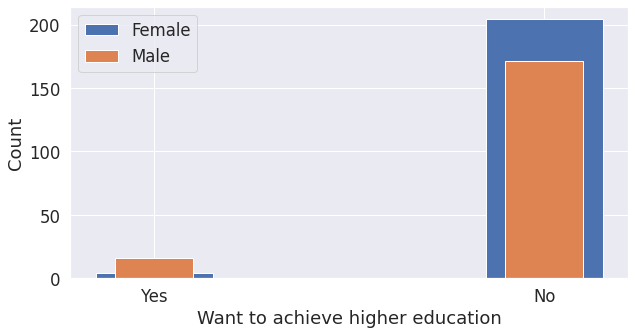

In [62]:
#Plots the bar chart
import seaborn as sns
import matplotlib.pyplot as plt

female = observed_Sex_Higher[0][:]
male = observed_Sex_Higher[1][:]
category = ['Yes', 'No']
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)

p1 = plt.bar(category, female, 0.3)
p2 = plt.bar(category, male, 0.2)
plt.legend((p1[0], p2[0]), ('Female', 'Male'))
plt.xlabel('Want to achieve higher education')
plt.ylabel('Count')
plt.show()

In [37]:
female.value_counts()

True     208
False    187
Name: sex, dtype: int64

###Two pairs of variables that are independent (have no significant relationship)

Two pairs of variables that are dependent (are associated with one another)


1) Null Hypothesis: There is no relationship between Travel Time and Absences

2)Alternative hypothesis: There is a relationship between Travel Time and Absences

3)Confidence Level: 95%


In [ ]:
#lets take a look at absence and travel-time. Asumming that there is a no relationship between number of absence and travel time

In [ ]:
#home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
students1['traveltime'].value_counts()

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

In [ ]:
#students1['absences'].value_counts()

In [64]:
absences_labels= ['1-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
absences_cutpoints = [0,9, 19, 29, 39, 49, 59, 69, 100]

students1['absences_categories'] = pd.cut(students1['absences'], absences_cutpoints, labels=absences_labels)
students1['absences_categories'].value_counts()

1-9      197
10-19     64
20-29     13
50-59      2
30-39      2
70-79      1
40-49      1
60-69      0
Name: absences_categories, dtype: int64

In [65]:
observed = pd.crosstab(students1['traveltime'], students1['absences_categories']).values
print(observed.shape)
observed

(4, 7)


array([[125,  49,   6,   0,   1,   2,   0],
       [ 54,  13,   5,   2,   0,   0,   1],
       [ 14,   1,   2,   0,   0,   0,   0],
       [  4,   1,   0,   0,   0,   0,   0]])

In [66]:
observed_Contigency_table = pd.crosstab(students1['traveltime'], students1['absences_categories'])
observed_Contigency_table

absences_categories,1-9,10-19,20-29,30-39,40-49,50-59,70-79
traveltime,,,,,,,
1,125,49,6,0,1,2,0
2,54,13,5,2,0,0,1
3,14,1,2,0,0,0,0
4,4,1,0,0,0,0,0


In [ ]:
chi_squared, p_value, dof, expected1 =stats.chi2_contingency(observed)
print(f"Chi-Squared: {chi_squared}")
print(f"P-Value: {p_value}")
print(f"Degree of Freedom: {dof}")
print(f"Expected: {expected1}")

Chi-Squared: 18.218216601393372
P-Value: 0.4413665325071191
Degree of Freedom: 18
Expected: [[1.28753571e+02 4.18285714e+01 8.49642857e+00 1.30714286e+00
  6.53571429e-01 1.30714286e+00 6.53571429e-01]
 [5.27678571e+01 1.71428571e+01 3.48214286e+00 5.35714286e-01
  2.67857143e-01 5.35714286e-01 2.67857143e-01]
 [1.19607143e+01 3.88571429e+00 7.89285714e-01 1.21428571e-01
  6.07142857e-02 1.21428571e-01 6.07142857e-02]
 [3.51785714e+00 1.14285714e+00 2.32142857e-01 3.57142857e-02
  1.78571429e-02 3.57142857e-02 1.78571429e-02]]


Conclusion: The P-Value is greater than 0.05. With a confidence level of 95%, we can say that there is not enough evidence to reject the Null Hypothesis(That Travel time and absence have no significant relationship between them). Therefore, we can say that there is a likelyhood that Travel time and number of absences are independent variables.

In [ ]:
#The p-Value greater than 0.05 and the chi-squared value is 18.21 which tell us that there is not enough evidence to reject the null hypothesis


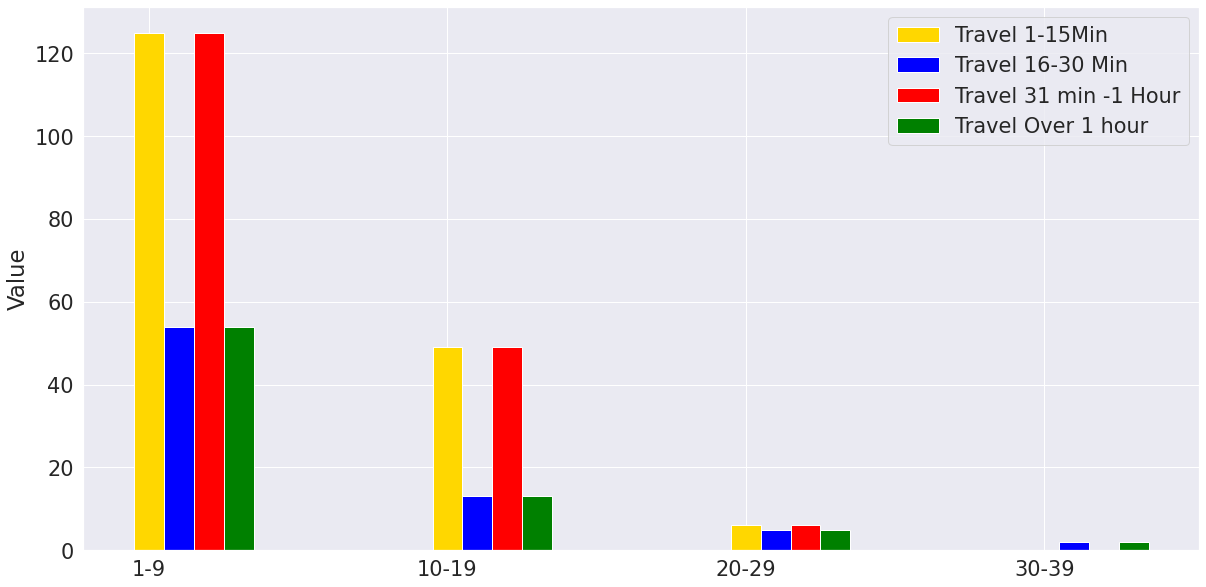

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
#Lets graph a portion of the contigency table

#sns.set(font_scale=1.9)
travel1= observed_Contigency_table.iloc[0][:4].values
travel2= observed_Contigency_table.iloc[1][:4].values
travel3= observed_Contigency_table.iloc[0][:4].values
travel4= observed_Contigency_table.iloc[1][:4].values

absences_category=['1-9', '10-19', '20-29', '30-39']
x= np.arange(4)

fig, ax =plt.subplots()
p1= ax.bar(x+0.00, travel1, width=0.10, label='Travel 1-15Min', color='gold')
p2= ax.bar(x+0.10, travel2, width=0.10, label='Travel 16-30 Min', color='Blue')
p3= ax.bar(x+0.20, travel3, width=0.10, label='Travel 31 min -1 Hour', color='Red')
p4= ax.bar(x+0.30, travel4, width=0.10, label= 'Travel Over 1 hour', color='green')

ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(absences_category)
ax.legend()



fig.set_size_inches(20,10)
plt.show()

### 3) Use NumPy to perform your own chi^2 test "from scratch" 

Pick any of the chi^2 tests that you ran in part 2 and try them on your own. You should get the same results that Scipy got for all four values returned from `chi2_contingency()`

In [ ]:
# YOUR WORK HERE
contingency_table_Travel_Absences = pd.crosstab(students1['traveltime'], students1['absences_categories'], margins=True)

contingency_table_Travel_Absences

absences_categories,1-9,10-19,20-29,30-39,40-49,50-59,70-79,All
traveltime,,,,,,,,
1,125,49,6,0,1,2,0,183
2,54,13,5,2,0,0,1,75
3,14,1,2,0,0,0,0,17
4,4,1,0,0,0,0,0,5
All,197,64,13,2,1,2,1,280


In [ ]:
travel_row_sums = contingency_table_Travel_Absences.iloc[0:4, 7].values
absences_col_sums = contingency_table_Travel_Absences.iloc[4, 0:7].values

print(travel_row_sums)
print(absences_col_sums)

[183  75  17   5]
[197  64  13   2   1   2   1]


In [ ]:
total = contingency_table_Travel_Absences.loc['All','All']
total

280

In [ ]:
expected = []
for i in range(len(travel_row_sums)):
    expected_row = []
    for column in absences_col_sums:
        expected_val = column*travel_row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(4, 7)
[[1.28753571e+02 4.18285714e+01 8.49642857e+00 1.30714286e+00
  6.53571429e-01 1.30714286e+00 6.53571429e-01]
 [5.27678571e+01 1.71428571e+01 3.48214286e+00 5.35714286e-01
  2.67857143e-01 5.35714286e-01 2.67857143e-01]
 [1.19607143e+01 3.88571429e+00 7.89285714e-01 1.21428571e-01
  6.07142857e-02 1.21428571e-01 6.07142857e-02]
 [3.51785714e+00 1.14285714e+00 2.32142857e-01 3.57142857e-02
  1.78571429e-02 3.57142857e-02 1.78571429e-02]]


In [ ]:
observed = pd.crosstab(students1['traveltime'], students1['absences_categories']).values
print(observed.shape)
observed

(4, 7)


array([[125,  49,   6,   0,   1,   2,   0],
       [ 54,  13,   5,   2,   0,   0,   1],
       [ 14,   1,   2,   0,   0,   0,   0],
       [  4,   1,   0,   0,   0,   0,   0]])

In [ ]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 18.218216601393372


In [ ]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
#print(f"Degrees of Freedom: {dof}") 
#print("Expected: \n", np.array(expected))

Chi-Squared: 18.218216601393372
P-value: 0.4413665325071191


## Stretch goals:

### 1. Refactor your code so it is elegant, readable, and holds reusable code in functions.

In [ ]:
# YOUR WORK HERE



### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics?

- What are hypothesis test? How are they useful?

- What is a "null hypothesis?"

- What is a p-value and what does it represent?

- What does it mean for something to be "statistically significant?"

- What is a test statistic and how does it relate to a p-value?

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)